  # Schließende Statistik mit Python
  
  Graduate Campus Hochschule Aalen, Prof. Stefan Rist

Die schießende Statistik versucht aus beobachteten Daten (in der Regel Stichproben) Schlüsse auf die Grundgesamtheit zu ziehen.  Ein typisches Beispiel sind Wahlumfragen oder Marktanalysen. Ein Teil der Bevölkerung oder möglichen 
Kunden wird mittels eines Fragebogens zu bestimmten Themen befragt und aus den Antworten der Teilnehmer versucht der
Data-Analyst das Wahl- bzw. Kaufverhalten der gesamten Bevölkerung zu analysieren. 

In diesem Notebook werden wir lernen wie wir bestimmte Aussagen anhand von Stichproben treffen können. Dieses Notebook ist als Begleitung für die Vorlesung gedacht und nicht als in sich vollständig zu betrachten.

Als erstes laden wir die benötigten Bibliotheken

In [5]:
import numpy as np # enthält viele mathematische Funktionen
import pandas as pd
import matplotlib.pyplot as plt   # zum erstellen von Graphen
#import seaborn as sns # zum erstellen von Graphen
#import plotnine as p9

import random as rand


plt.rcParams["figure.figsize"]=8,6 #Größe aller Bilder in diesem Notebook


### Wahrscheinlichkeitsverteilungen 

Die Wahscheinlichkeitsdichte, die Kummulierte Wahrscheinlichkeit und die Quantile können wir mit dem scipy.stats Paket recht einfach berechnen. 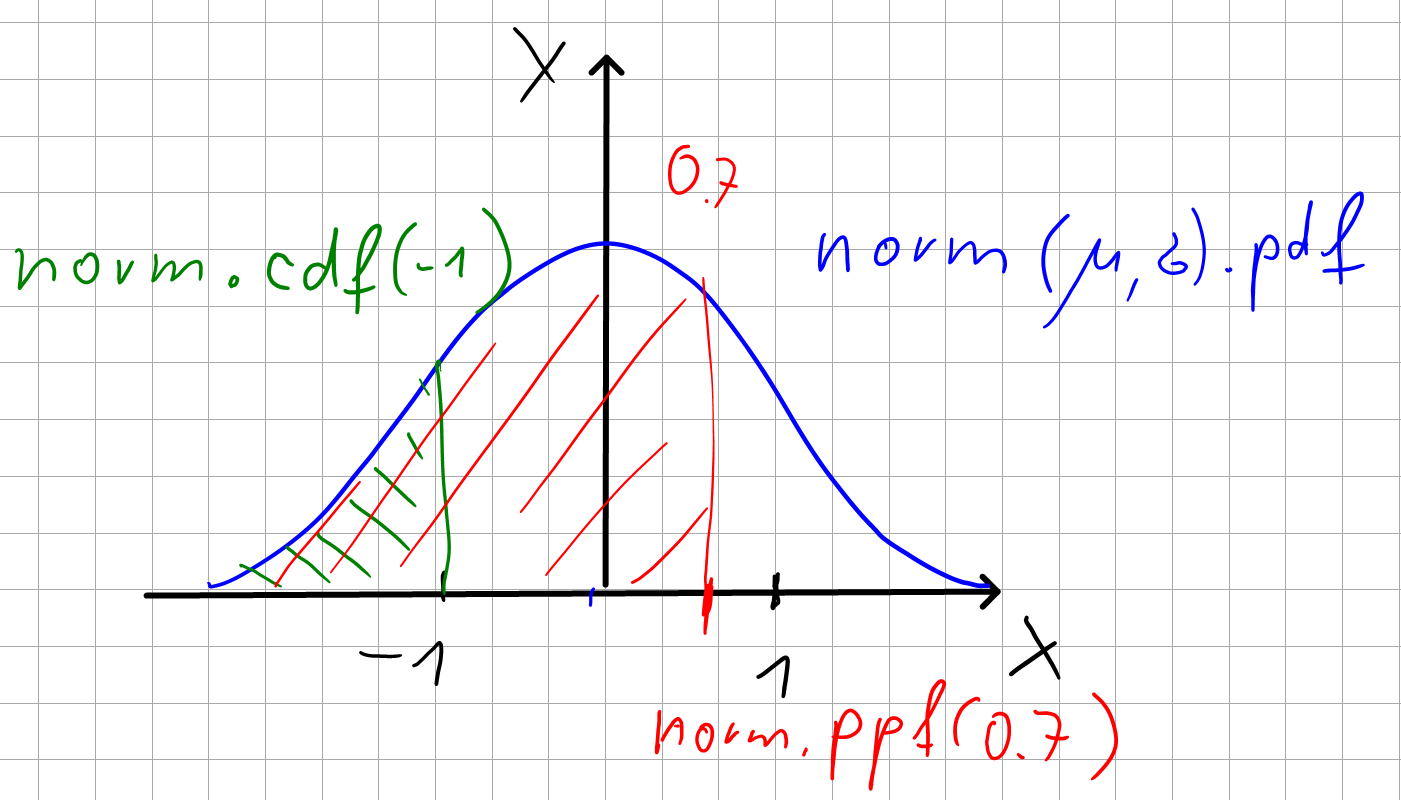

### Die Normalverteilung


Die Zufallsvariable $X$~$N(\mu,\sigma)$ heißt Normalverteilt mit Mittelwert $\mu$ und Standardabweichung $\sigma$ wenn X  die folgende Dichtefunktion hat:

$$ f(X) = \frac{1}{\sqrt{2\pi}\sigma}\, e^{-\frac{(X-\mu)^2}{2\sigma^2}} $$

Es ist gilt für Erwartungswert $E[X]=\mu$ und Varianz $Var[X]=\sigma^2$.

Darstellen und berechnen können wir die Normalverteilung mit der scipy.stats.norm Funkion

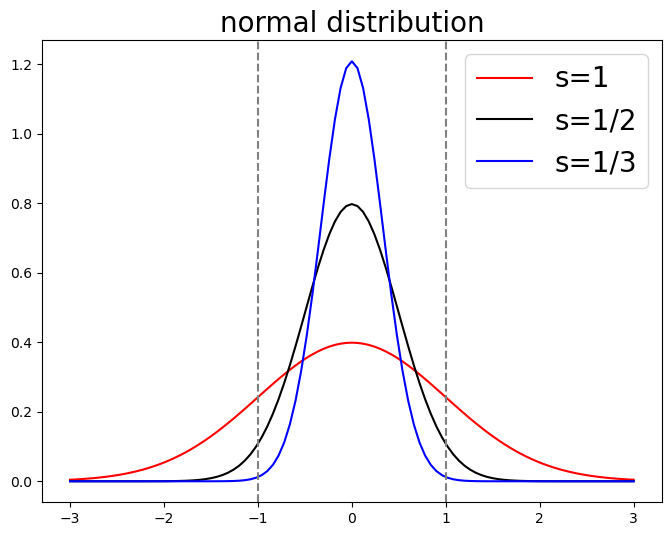

In [2]:
from scipy.stats import norm # Importieren der Normalverteilung

#Wahrscheinlichkeitsdichte
x = np.linspace(-3,3,101)
plt.plot(x,norm.pdf(x,loc = 0, scale = 1),'-r',label = 's=1')
plt.plot(x,norm.pdf(x,loc = 0, scale = 0.5),'-k',label = 's=1/2')
plt.plot(x,norm.pdf(x,loc = 0, scale = 0.33),'-b',label = 's=1/3')
plt.axvline(x=-1,color='gray',linestyle = '--')
plt.axvline(x=1,color='gray',linestyle = '--')
plt.title('normal distribution',fontsize =20)
plt.legend(fontsize = 20)
plt.show()

**Übung:**
-  Plotten Sie die die Wahrscheinlichkeitsverteilungen für $X_1 \sim N(0,1)$ und $X_2 \sim N(1,0.3)$
- Schätzen Sie zuerst und Berechnen Sie danach die Wahrscheinlichkeiten $p_1 = P(0\le X_1 \le 1)$ und $p_2 = P(0\le X_2 \le 1)$. Wie gut war Ihre Schätzung?
- Bei einer Klausur war der Mittelwert 60 und die Standardabweichung 8. Sie wollen den besten $3$% eine 1.0 geben. Wieviele Punkte sind notwendig um eine 1.0 zu bekommen?

In [1]:
from scipy.stats import norm # Importieren der Normalverteilung


In [2]:
# Wahrscheinlichkeiten:
# Erwartung ist 

In [3]:
#Quantile

So wie bei der Normalverteilung können wir die entsprechenden Werte für beliebige Wahrscheinlichkeitsverteilungen berechnen:

### Die Chi-Quadrat Verteilung

Es seien $Z_1, Z_2, \dots Z_n$ n Standardnormalverteilte Zufallsvariablen, dann ist die Zufallsvariable

$$X = Z_1^2 + Z_2^2 + \dots Z_n^2  $$

Chi-Quadrat verteilt mit n Freiheitsgraden. Man schreibt

$$ X\sim  \chi^2_n$$

Es gilt $E[X]=n$ für den Mittelwert (Erwartungswert) und $Var[X] = 2n$ für die Varianz. Für eine große Anzahl an Freiheitsgraden $n\gg 1$ geht die Chi-Quadrat Verteilung in eine Normalverteilung über $\chi^2_n \sim N(n,\sqrt{2n}), \,\ n\gg 1$

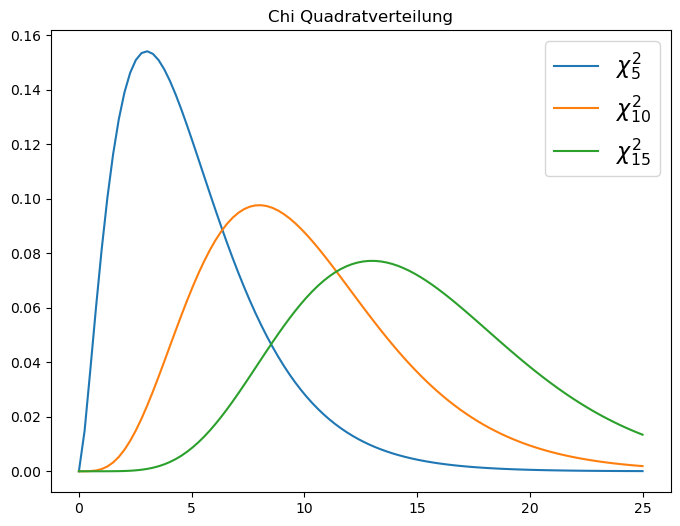

In [17]:
from scipy.stats import chi2 # Importieren der Chi Quadratverteilung

#Wahrscheinlichkeitsdichte
x = np.linspace(0,25,100)
y1 = chi2(5).pdf(x)
y2 = chi2(10).pdf(x)
y3 = chi2(15).pdf(x)
plt.plot(x,y1,label = '$\chi^2_5$')
plt.plot(x,y2,label = '$\chi^2_{10}$')
plt.plot(x,y3,label = '$\chi^2_{15}$')
plt.legend(prop={'size': 16})
plt.title('Chi Quadratverteilung')
plt.show()

Wir sehen wie die Chi-Quadrat Verteilung für mehr Freiheitsgrade $n\gg 1$ immer Gaussförmiger wird und sich einer Normalverteilung mit Mittelwert $2n$ annähert.

In [18]:
#Wahrscheinlichkeit
print(chi2(5).cdf(5))  

#Quantile
print(chi2(5).ppf(0.9)) #Percent point function (inverse of `cdf`) at q of the given RV.

0.5841198130044919
9.236356899781121


### Die Binomialverteilung

Es seien $X_j$ mit $j = 1\dots n$ n- unabhängige Bernoulli-Zufallsvariablen (Nur 2 Ausgänge, Kopf oder Zahl) mit 
\begin{eqnarray}
P(X_j=1) &=& p \\
P(X_j=0) &=& 1-p
\end{eqnarray}
Dann ist die Zufallsvariable
$$X = X_1 + X_2 + \dots X_n $$

Eine Binomialverteilte Zufallsvariable mit der Wahrscheinlichkeitsdichte

$$P(X=k) = \left ( \begin{array}{c} N \\ k \end{array} \right ) p^k (1-p)^{N-k} $$

Die Zufallsvariable $X$ gibt die Wahrscheinlichkeit für $k$-Erfolge bei $N$-Versuchen an, wenn die Einzel-Wahrscheinlichkeit für einen Erfolg $p$ beträgt.

Für Mittelwert und Varianz gilt
\begin{eqnarray}
X[X] &=& N\cdot p \\
Var[X] &=& N\cdot p\cdot(1-p)
\end{eqnarray}

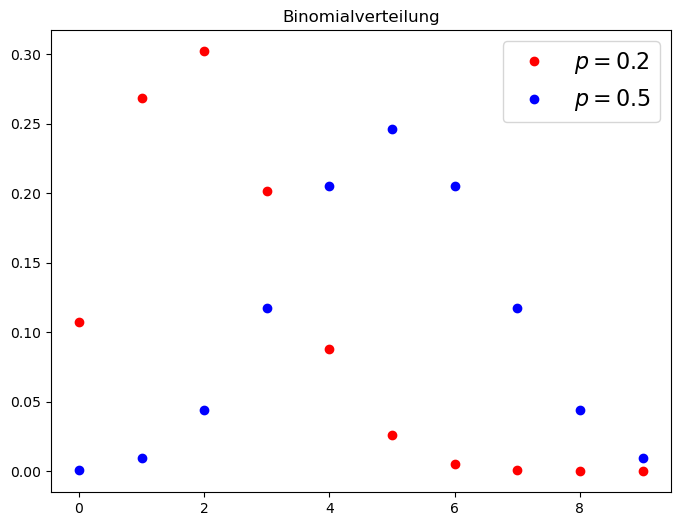

In [23]:
from scipy.stats import binom  # Importieren der Binomialverteilung

#Wahrscheinlichkeitsdichte
k = np.arange(0,10)
y1 = binom(10,0.2).pmf(k)
y2 = binom(10,0.5).pmf(k)
plt.plot(k,y1,'ro',label = '$p=0.2$')
plt.plot(k,y2,'bo',label = '$p=0.5$')
plt.legend(prop={'size': 16})
plt.title('Binomialverteilung')
plt.show()


In [ ]:
#Wahrscheinlichkeit
print(binom(10,0.5).cdf(2.5))   # Bei diskreten Verteilungen am besten immer .5 Zahlen verwenden

#Quantile
print(binom(10,0.5).ppf(0.7)) #Percent point function (inverse of `cdf`) at q of the given RV.

#check 70% Quantil
print(binom(10,0.5).cdf(5.5)) 
print(binom(10,0.5).cdf(6.5)) 


### Regen in Mannheim

Die Niederschlagsmenge ($mm/m^2$) in Mannheim im Juli in den letzten Jahren betrug http://archiv.mannheim-wetter.info/niederschlag.shtml

(184,44,139,47,104,78,73,102,44,105,39,116,54,14,123,42,68,78,42,51)

Eine Versicherungsgesellschaft für Landwirte möchte Abschätzen wie wahrscheinlich es ist, dass es weniger als
$10 mm/m^2$ oder mehr als $200 mm/m^2$ regnet, da in beiden Fällen Ernteausfälle zu erwarten sind.  
Wir gehen davon aus, dass die Grundgesamtheit normalverteilt ist und schätzen für deren 
Mittelwert $\mu = \bar{x}$ und $\sigma = s$. 

Bestimmen Sie die Wahrscheinlichkeit für einen Ernteausfall:
- Mit Hilfe der Normalverteilung
- Mit Hilfe der "korrekten" Student - t Verteilung

In [9]:
#Bestimmen Sie Mittelwert und Standardabweichung der gegebenen Niederschlagsmenge
X = np.array([184,44,139,47,104,78,73,102,44,105,39,116,54,14,123,42,68,78,42,51])
Xbar = 0
S = 0

print('Mittelwert:',Xbar,'Standardabweichung:',S)

#Berechnen Sie mit Hilfe der Funktion norm.cdf die gefragte Wkt.

#help(norm.cdf)
p_groesser = 0
p_kleiner = 0
p_gesamt = p_groesser + p_kleiner
print('Wkt. zuviel Regen [%]',round(p_groesser*100,2),'Wkt. zu wenig Regen [%]'
      ,round(p_kleiner*100,2),'Wkt. Ernteausfall [%]',round(p_gesamt*100,2))



Mittelwert: 0 Standardabweichung: 0
Wkt. zuviel Regen [%] 0 Wkt. zu wenig Regen [%] 0 Wkt. Ernteausfall [%] 0


Wie in der Vorlesung besprochen wollen wir jetzt noch einmal die Wahrscheinlichkeit mit Hilfe der Student'schen t-Verteilung berechnen

In [10]:
from scipy.stats import t

#Berechnen Sie mit Hilfe der Funktion t.cdf die gefragte Wkt.
N = len(X)

# Student t Verteilung benötigt skalierte Werte


#help(t)
p_groesser = 0
p_kleiner = 0
p_gesamt = p_groesser + p_kleiner
print('Wkt. zuviel Regen [%]',round(p_groesser*100,2),'Wkt. zu wenig Regen [%]'
      ,round(p_kleiner*100,2),'Wkt. Ernteausfall [%]',round(p_gesamt*100,2))


Wkt. zuviel Regen [%] 0 Wkt. zu wenig Regen [%] 0 Wkt. Ernteausfall [%] 0


Wir sehen, ein Prozent Unterschied kann bei der Berechnung einer Versicherungsquote durchaus einen großen Unterschied machen!

Der Unterschied zwischen der t-Verteilung und der Normalverteilung macht sich besonders an den Enden der Verteilung, also bei seltenen Ereignissen bemerkbar!

## Einzelmessungen und Mittelwerte

Wollen wir Aussagen über Einzelmessungen treffen, so ist deren Schwankung durch die Standardabweichung $\sigma$ oder deren
Schätzwert $S$ gegeben. Machen wir aber eine Aussage über ein mittleres Verhalten so ist die Schwankung durch $\mu/\sigma$ 
gegeben.

Ist die echte Standardabweichung bekannt, so können wir die Normalverteilung für unsere Schätzung verwenden. Wird die Standardabweichung aus der Stichprobe geschätzt dann ist die Student-t Verteilung zu verwenden.

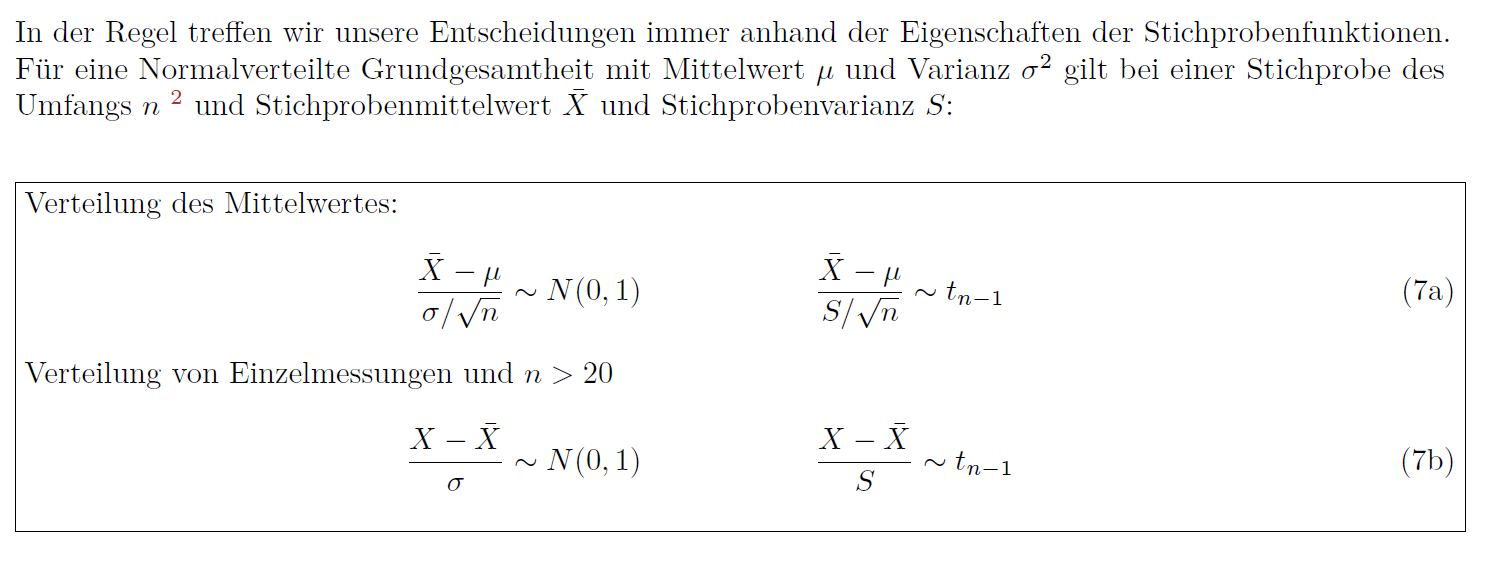

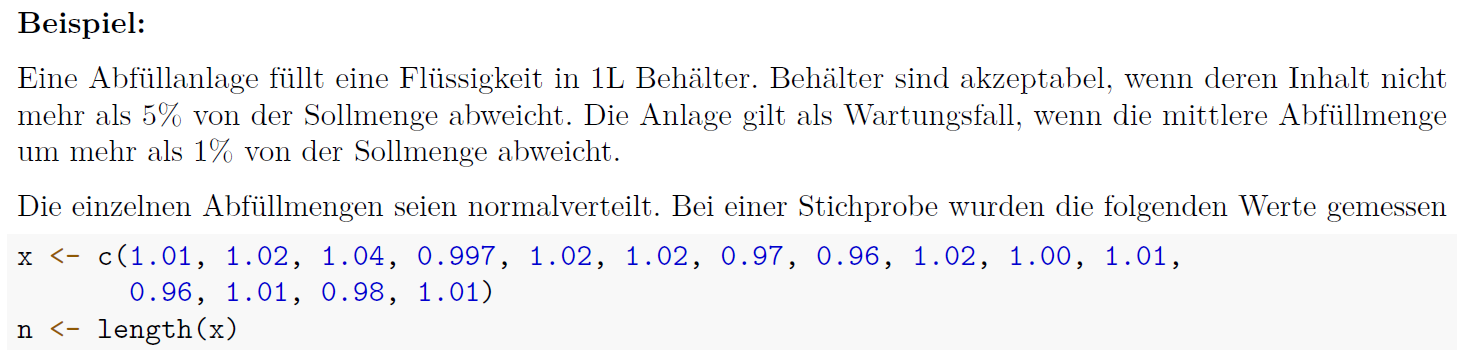

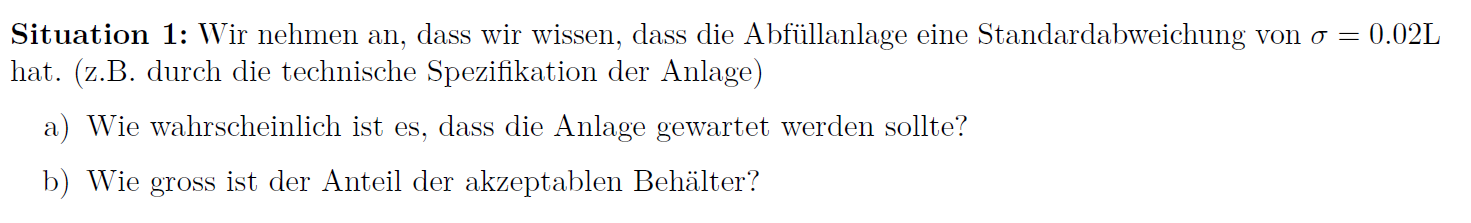

In [11]:
# Machen Sie hier Ihre Berechnungen
# Vermutlich ist eine Skizze auf einem Blatt Papier hilfreich

x = np.array([1.01,1.02,1.04,0.997,1.02,1.02,0.97,0.96,1.02,1.00,1.01,0.96,1.01,0.98,1.01])
n = len(x)



Sie sollten die folgenden Ergebniss erhalten
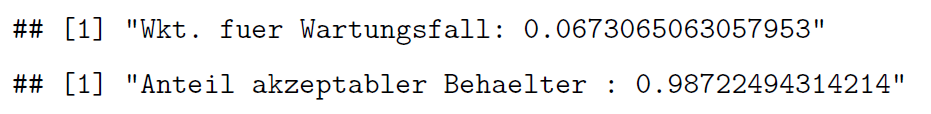

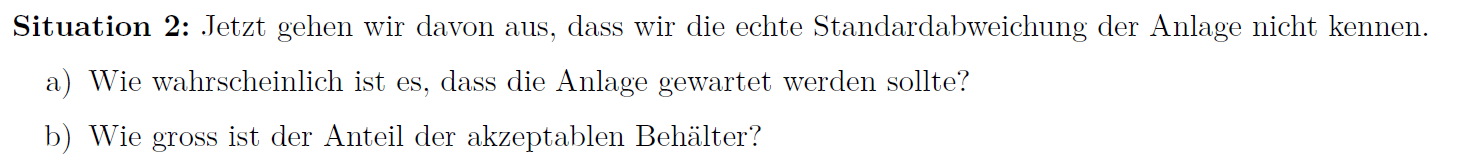

In [12]:
# Machen Sie hier Ihre Berechnungen
# Vermutlich ist eine Skizze auf einem Blatt Papier hilfreich



!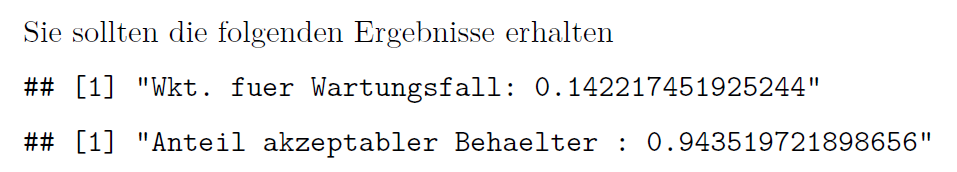

# Intervall Schätzungen

## Konfidenzintervalle

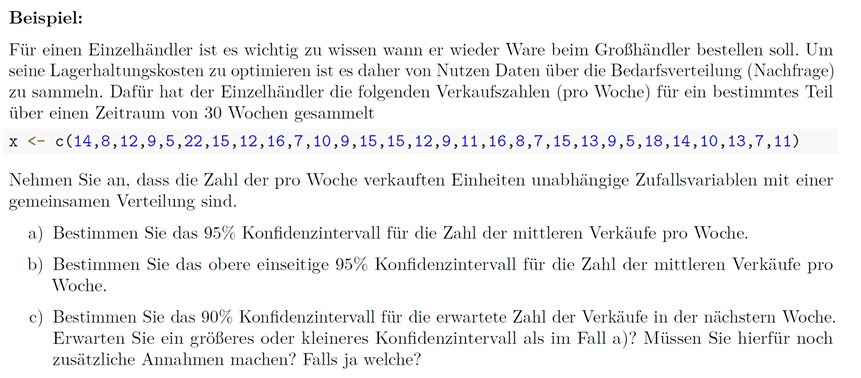

Hinweis einseitiges Vertrauensintervall
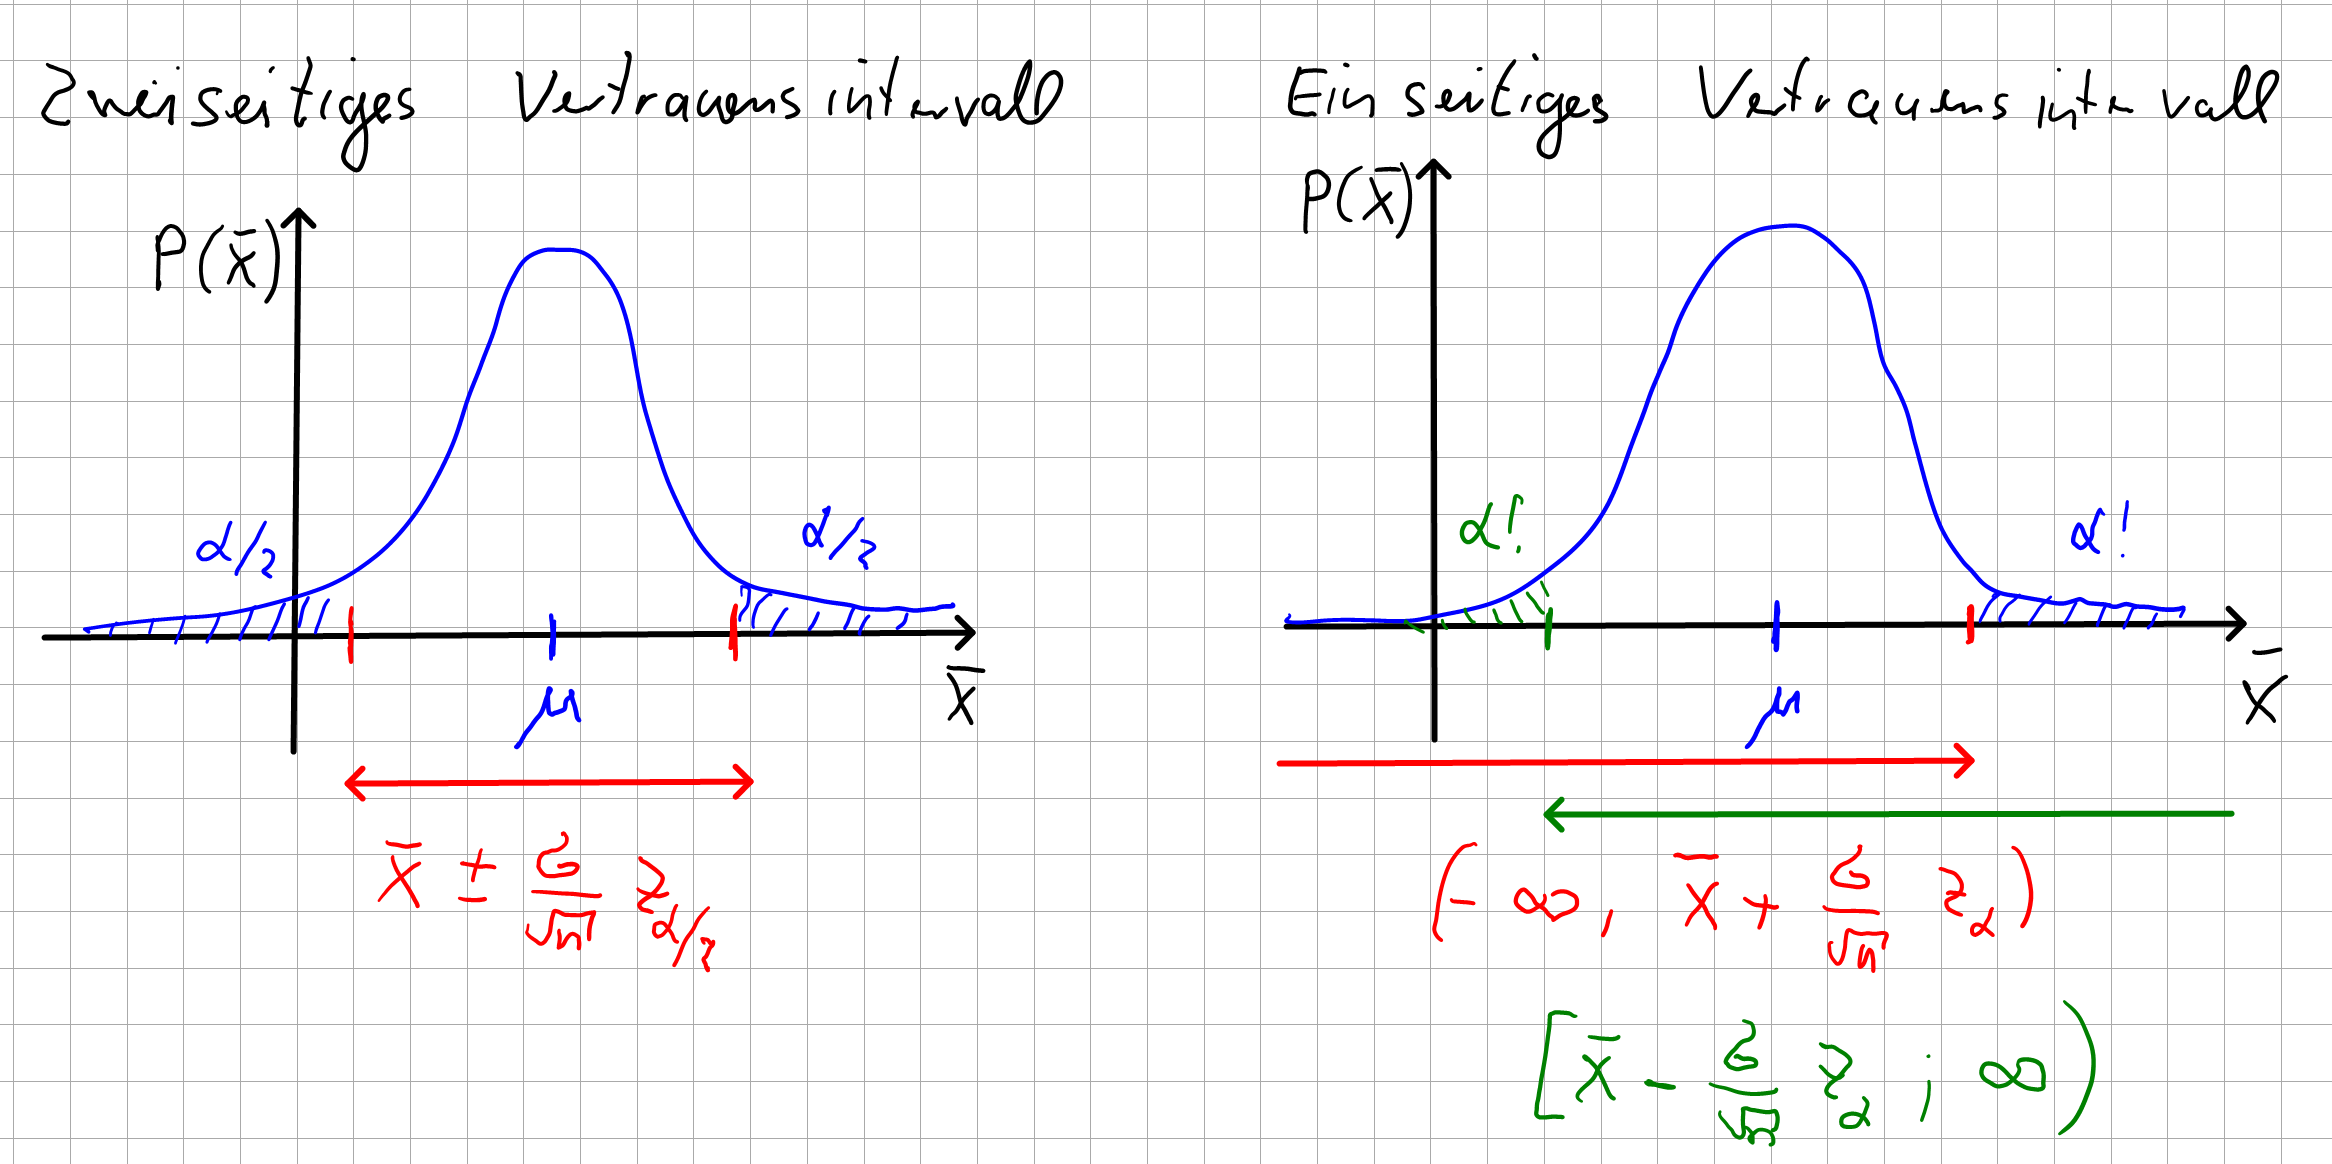

In [13]:
# Führen Sie hier Ihre Berechnungen durch
x = np.array([14,8,12,9,5,22,15,12,16,7,10,9,15,15,12,9,11,16,8,7,15,13,9,5,18,14,10,13,7,11])
n = len(x)


!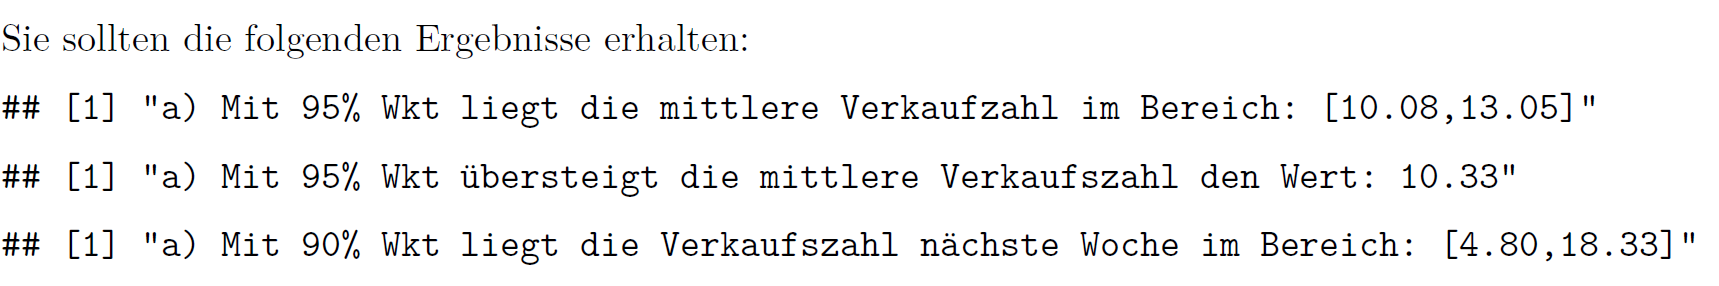